<a href="https://colab.research.google.com/github/VirajDilshanKumarage/AI-and-Machine-Learning/blob/k-mean-clustering-implementation/kMeanClusteringImplimentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')

In [8]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
149,150,Male,34,78,90
76,77,Female,45,54,53
132,133,Female,25,72,34
58,59,Female,27,46,51
59,60,Male,53,46,46


In [9]:
data[['Annual Income (k$)','Spending Score (1-100)']]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
data=data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data=data[['income','score']]

In [11]:
data.sample(5)

,income,score
45,39,65
41,38,92
143,76,87
63,47,59
1,15,81


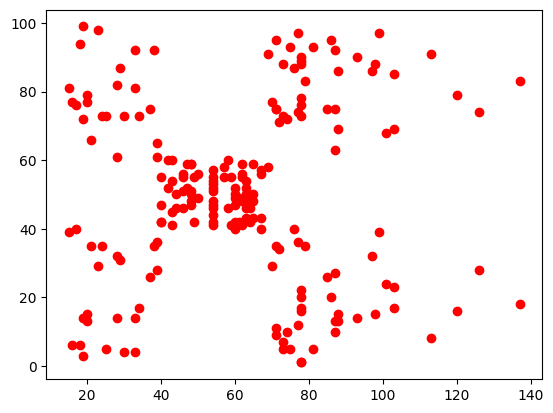

In [28]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'],color='red')

In [13]:
from sklearn.cluster import KMeans
k_values=[1,2,3,4,5,6,7,8,9,10]
wcss_error=[]
for k in k_values:
  model =KMeans(n_clusters=k)
  model.fit(data[['income','score']])
  wcss_error.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
wcss_error


[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37271.88623658949,
 30241.34361793658,
 25030.38309852032,
 21850.165282585636,
 19634.554629349976]

Text(0, 0.5, 'wcss_error')

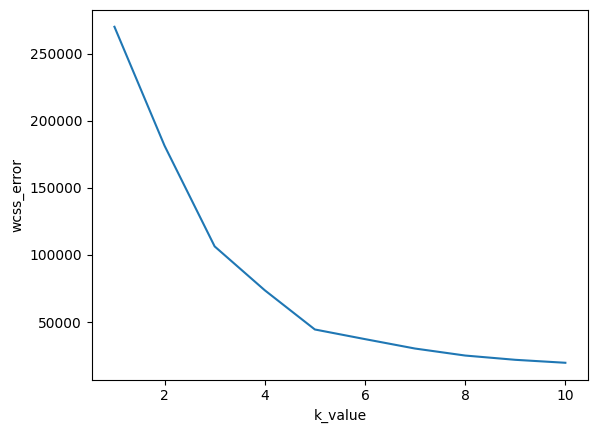

In [15]:
plt.plot(k_values,wcss_error)
plt.xlabel('k_value')
plt.ylabel('wcss_error')

In [17]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
pred=model.fit_predict(data)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [18]:
data['cluster']=pred

In [19]:
data.head(5)

,income,score,cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


In [21]:
c1=data[data['cluster']==0]
c2=data[data['cluster']==1]
c3=data[data['cluster']==2]
c4=data[data['cluster']==3]
c5=data[data['cluster']==4]



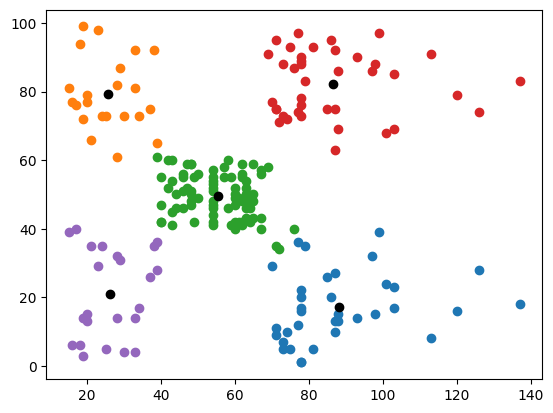

In [27]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')

In [24]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])